In [107]:
import spacy
nlp = spacy.load("nl_core_news_lg")

### Importing spaCy and loading texts and annotations

In [35]:

from tqdm import tqdm

import gzip
import os

import random

import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas

corpus = "./Corpus/"
anns = "./Annotations/"

def load(file, corpus, lines=False):
    with open(os.path.join(corpus, file), "r") as handle:
        if lines:
            return list(handle) # handle.readlines()
        else:
            return handle.read()

### Using csv to read BRAT annotations

In [36]:

def read_csv(file, corpus=anns):
    file = load(file, corpus, lines=True)

    for i, line in enumerate(file):
        if i == 0: print("first line:", line) #to see brat format
        tab_cols = line.split("\t")
        
        if tab_cols[0].startswith("T"):
            last = tab_cols[-1].strip()
            first = tab_cols[0]
            
            middle = tab_cols[1].split()
#             print(middle, middle[0], middle[-1])
            middle = [middle[0], middle[1], middle[-1]]
            
            yield (first, *middle, last)
            
def filter_rows(rows):
    for r in rows:
        if r[1].upper() in ["WOMEN", "INDIGENOUS", "MEN", "GPE", "ORGANIZATION"]:
        #if r[1].upper() in ["PERSON", "ORG", "GPE", "WOMEN", "INDIGENOUS", "MEN"]:
            yield r
        
def change_rows(rows):
    for r in rows:
        entity_nr, entity_type, start, end, label = r
        yield int(start), int(end), entity_type.upper(), label


In [37]:
data = {}

for ann_f in os.listdir(anns):
    if not ann_f.endswith('.ann'): continue
        
    if len(load(ann_f, anns)) > 0:
        cur_name = ann_f.strip(".ann")
    
        txt_f = cur_name + ".txt"
        if os.path.isfile(os.path.join(corpus, txt_f)):
        
            #raw_text = load(txt_f, corpus)
            brat_entity_list = list(change_rows(filter_rows(read_csv(ann_f, anns))))
            
            data[txt_f] = (brat_entity_list)
        else:
            print("no file", txt_f)
    else:
        print("annotation file empty")

annotation file empty
annotation file empty
annotation file empty
first line: T1	Person 528 546	Abraham Salbindusz

annotation file empty
first line: T1	Person 42 54;55 61	Frans Willen waltig

annotation file empty
first line: T1	Group 59 63	volk

first line: T1	Organization 137 144;145 191	BewinP. „hebberen der g'octroijeerde coptimischhe Comp

annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation fil

annotation file empty
annotation file empty
first line: T1	Person 74 101	Christiaan Perdinant Cramer

first line: T1	Person 17 34	Iacobus mooijaard

annotation file empty
annotation file empty
annotation file empty
annotation file empty
first line: T1	Person 265 273;274 280	Anthonia van Os

first line: T1	Person 0 18	Pieter Adriaan Pla

first line: T3	GPE 71 77	Europa

first line: T1	Group 253 313;314 334	de LeijtEijgenen, die belijdenis van den Christelijken Gods„ dienst gedaan hebben

annotation file empty
annotation file empty
first line: T2	Person 36 69	Johan Gerad Risschir van Gaerbeek

annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
annot

annotation file empty
annotation file empty
first line: T1	Person 58 78	George zodewijk Pfei

annotation file empty
annotation file empty
first line: T1	Men 168 175	zoontje

first line: T1	GPE 525 532	Batavia

annotation file empty
first line: T1	Indigenous 495 513	huijsin boorlingen

first line: T1	Person 0 16	A: van den Bergh

first line: T1	Organization 398 414;415 463	Hoog Edele Groot Agtb: Heeren Bewind hebberen ter kamer Amsterdam

first line: T1	Person 240 256	Cornelis Potmans

first line: T1	Indigenous 239 251	lijf eigenen

first line: T1	Women 166 171	moede

annotation file empty
annotation file empty
first line: T1	Men 122 126	Heer

annotation file empty
annotation file empty
first line: T1	Person 524 530;531 543	Pieter an Ponningen

annotation file empty
first line: T1	Indigenous 526 534	slavinne

annotation file empty
annotation file empty
annotation file empty
annotation file empty
annotation file empty
first line: T1	Person 2798 2824	Anthonij Cornelis verspijk

first line

In [38]:
data


{'NL-HaNA_1.04.02_6847_0758.txt': [(853, 860, 'ORGANIZATION', 'Politie'),
  (1005, 1009, 'MEN', 'Heer'),
  (1118, 1125, 'GPE', 'Batavia'),
  (1207, 1217, 'WOMEN', 'huifsvrouw'),
  (1218, 1223, 'WOMEN', 'mejuf'),
  (1182, 1186, 'MEN', 'Heer')],
 'NL-HaNA_1.04.02_6847_0764.txt': [(149, 158, 'WOMEN', 'degterlje'),
  (397, 403, 'GPE', 'Europa'),
  (1142, 1151, 'WOMEN', 'dogtertje'),
  (1276, 1284, 'WOMEN', 'Juffrouw'),
  (2092, 2111, 'ORGANIZATION', 'Heeren Weesmesteren')],
 'NL-HaNA_1.04.02_6847_0016.txt': [(894, 911, 'GPE', 'nederlands Jordia'),
  (940, 946, 'GPE', 'batera'),
  (1791, 1800, 'WOMEN', 'Erfgename'),
  (1824, 1830, 'INDIGENOUS', 'slaaff'),
  (1844, 1852, 'INDIGENOUS', 'Slavinne'),
  (1844, 1852, 'WOMEN', 'Slavinne'),
  (1924, 1931, 'INDIGENOUS', 'slaeven')],
 'NL-HaNA_1.04.02_6847_0770.txt': [(137,
   191,
   'ORGANIZATION',
   "BewinP. „hebberen der g'octroijeerde coptimischhe Comp"),
  (199, 214, 'ORGANIZATION', 'Kamer Amstersan'),
  (205, 214, 'GPE', 'Amstersan'),
  (487,

### Terms for men, women and indigenous


In [39]:
def get_terms(data, group):
    for entity_list in data.values():
        for row in entity_list:
            if row[2] == group:
                yield row[3]
                
terms_men = set(get_terms(data, "MEN"))
terms_women = set(get_terms(data, "WOMEN"))
terms_indi = set(get_terms(data, "INDIGENOUS"))
terms_gpe = set(get_terms(data, "GPE"))
terms_org = set(get_terms(data, "ORGANIZATION"))

In [40]:
print(terms_men)

{'mons:r', 'DE:', 'Den welEdel Agtb: Heeren', 'Iongens', 'heer', 'Schoon zoon', 'DE M„r', 'den E: E:', 'vader', 'de heeren', 'man', 'Den E', 'Ionga', 'mons:', 'M:r', 'doopzoon', 'de Heer', 'haer', 'den wel Eerw: Heer', 'Den Welherw: Heer', 'Mons:', 'meester', 'alleu Heere', 'welEdele Gestr: Heer', 'voogden', 'm:e', 'den heer', 'geadopteerde zoontje', 'd’ E:', 'Den Hoog Edelen Groot Agtbaaren Heer', 'slaaff', 'zoon', 'sijnen', 'Jonge', 'M=r', 'Ed„e', 'Heeren', 'den wel Ed: Heer', 'Neeff', 'Den Manh:', 'Heere', 'wager', 'm:', 'broeders', 'den E', 'S„r', 'voogd', 'De WelEdele Heeren', 'Edele Geste Heer', '1„e', 'zoons', 'Den wel Edele vestrenge Heer M„r', 'De Wel Edele groot Agtb: Heeren', 'M:', 'opperm:', 'broeder', 'Ionge', 'A„r', 'm:r', 'hem', 'M„r', 'den Wel Edele Gestrengen hier', 'dE M:r', 'agt: heeren', 'slaeff', 'hier', 'Heer', 'van heeren', 'soon', 'E: mH', 'doopvader', 'DeHeer en M=r', 'de heer', 'zomen', 'De Heer', 'loo', 'de Heeren', 'VE:', 'den Eerwaarde Heer', 'Mons:r', 'Jon

In [41]:
print(terms_org)

{'Hooge Regeeringe van Nederlakds India', 'Weeskamer', 'Heeren Weermeesteren', 'Eerw: Collegie, van Heeren Heemra „den der Bataviase', 'de Edele Hooge Regeering dan Neder„ lands India', 'de hooge regeering', 'Eerw: Collegie van Heeren Weesmeesteren', 'Politie', 'Jndinsche regeering', "Heeren Berind hebberen der g'eetregeerde d tindinhe Comp:e", 'Edele Hooge, regeeringe', 'Comp:e', 'de Edele Hooge Regeering van Nederlandt India', 'debaele hoge regeeringe van nederslands India', "g'Ectroijeerde oostjndische Comp", 'WelEdele Groot Agtb: Heeren Bewind. hebberen der Geostroijeerde oost Jndische Comp: ter kamer Amsterdam', 'Heeren Weesmeesteren', 'kamer Amsterdam', 'EHooge Regeeringe van Nederlands India', 'eeren Commissarissen uijt den agtb: raad van Justitie des Casteels Batavia', 'Heeren weermerteren', 'gectroijeerde Comp oortjndische Compagnie', 'Agtb: Raad van Justitie des Casteels Batavia', 'Heeren weesmer, „teren', 'De wel Edele Groot Agtbaeren Heeren Bewindhebberen der Geactroijeerde

In [45]:
print(terms_women)

{'Mejasp=m', 'nigt', 'suester', 'vaije Christen vrouw', 'Mejuff=r', 'Iup=m', 'erfgenaame', 'Jep=m', 'Testatrice', 'de vrij Christen vrouw', 'mejusf=r', 'Jop=m', 'doop dogter', 'Mejufrouw', 'huijsv:', 'Iufrouw', 'schoon moeder', 'mesust=r', 'puysvrouw', 'hijsvrouw', 'moeden', 'haar moeder', 'moede', 'wijff', 'zuster', 'ngt', 'doctertje', 'Sister', 'Pavinnen', 'dogters', 'huijs „vrouw,', 'Hluste', 'do ter', 'me jnst=m', 'gedaagdesse', 'Mems=n', 'Meju„ „frouw', 'lavenne', 'Huijevrouw', 'Enlandsche Crietene persoone', 'voogdesje', 'mesisp=m', 'slavinud', 'haker', 'Juff=re', 'zusters', 'huijsvrouw', 'susters', 'moeder', 'voogdesse', 'Jntt=e', 'meijden', 'vrauwe', 'Dist=m', 'slavinne', 'Mepff:r', 'slavinnen', 'mejuf', 'wed:', 'me jusf=r', 'wed:e', 'weduwe', 'meid', 'wijf', 'Suster', 'Juff=r', 'huijs„ vrouw', 'Juffrouw', 'Jn p=m', 'machome', 'frouw', 'suste', 'Stariynen', 'Mejuffrouw', 'Nejuffrouw', 'vrije ontristen vrouw', 'Mejuff:r', 'wed', 'M„r', 'Juff„r', 'huijs vrouw', 'sla „kinnen', 'me

In [46]:
print(terms_indi)

{'Slaaf', 'de vrije Ionge', 'vrije Chrisle vrouw', 'lijfEijgenen', 'lijfEigenen', '„je', 'bereeds vrijgegevene slavinne', 'de vrij Christen vrouw', 'vrije Onchriste vrouwe', 'lijf eijdenen', 'vrije maleijtse vrouw', 'Pavinnen', 'de LeijtEijgenen, die belijdenis van den Christelijken Gods„ dienst gedaan hebben;', 'slaaff', 'lijf eijgenen', 'lavenne', 'lijfeigenen', 'Enlandsche Crietene persoone', 'slavinud', 'vrije Chris ten vrouw', 'slaven die beleijdenisse van den Christelijken Podsdienst gedaan hebben', 'boorlingen', 'lijf eidenen', 'Chineese korpitaal', 'lijffeijgenen', 'slavinne', 'slavinnen', 'Inlander', 'vrije onchristen vrouw', 'lijff Eigenen', 'hueys inboorling', 'huijsin boorlingen', 'sla„ verrije', 'lijff eigenen', 'slafsche', 'slf', 'Lijfflijgenen', 'slaeven', 'Stariynen', 'in vrijdom gestelde hueys inboorling', 'LijfEijgenen', 'sla„ verrige', 'Leijt bijgenen', 'haere kinderen', 'Legt Eijgenen', 'vrije ontristen vrouw', 'lyfeigenen', 'onchristen vrouw', 'slaave Iongens', 'sl

In [54]:
terms_indi_women = terms_women & terms_indi


In [55]:
print(terms_gpe)

{'nederlands India', 'pack poeram', 'maleijtse', 'frauenkerk', 'Geoninge', 'S„t Aubin', 'Boegja', 'Japan', 'amstveromme', 'Holland', 'Amster „dam,', 'Zwolle', 'Bestavia', 'nederdui Vshegemeen te', 'op de hoek van de Amsterdam graagt', 'binnen de stad Batavia', 'Casteel batavia', 'Ben„ „galen', 'de westzijde van de heere straet binnen destad', 'Campen', 'Balij', 'Chineese grogt', 'Jopan', 'de stad Bata„ via', 'Coegies', 'palembang', 'Eendrom', 'Einbeck', 'Iaccatra', 'bohor', 'boegis', 'Stad Batavia', 'Amster„ dam', 'batnera', 'batmera', 'Casteel Orange', 'de Theewaterstraat', 'Batavia', 'amster:', 'babavia', 'Leeren', 'holland', 'maastreiht', 'Iaras oostcust', 'Jocarta', 'de angiolse vaart buijten destad', 'Jappan', 'Maccasser', 'Bohavia', 'Goelo Chincu', 'papanger', 'Rotterdammer poort', "'tGaaven Ergedag", 'nederlands india g', 'Surmatra', 'Suijlesten', 'wystzijne van de Grootte Rivier binnen destaet', 'Amstersan', 'am„ Herdan', 'zwol', 'balie', 'Nederlands Jndia', 'Frankena Gutenand 

### Creating an Index for women, indigenous 




In [85]:
test_corpus = "./Corpus" #could put in any other folder just to try
docs = {f: load(f, test_corpus) for f in filter(lambda f: f.endswith(".txt"), os.listdir(test_corpus))}

In [86]:
def build_group_regex(term_set):
    escaped = {re.escape(s) for s in term_set}
    return r"|".join(["[\s+|^]("+t+")\s+" for t in reversed(sorted(escaped, key=len))])

def get_mentions(text, group_regex):
    for m in re.finditer(group_regex, text):
        found_term = m.group()
        stripped = found_term.lstrip()
        
        if stripped == found_term:
            yield m.start(), found_term.rstrip()
        else:
            yield (m.start() + (len(found_term) - len(stripped))), stripped.rstrip()


def get_group_records(docs, group_terms):
    group_regex = build_group_regex(group_terms)

    for fname, txt in docs.items():
        for ind, found_term in get_mentions(txt, group_regex):
            yield(fname, ind, found_term)

In [87]:
import pandas as pd
women_records = list(get_group_records(docs, terms_women))
women_df = pandas.DataFrame.from_records(women_records, columns=["filename", "start_index", "identifier_term"])

men_records = list(get_group_records(docs, terms_men))
men_df = pandas.DataFrame.from_records(men_records, columns=["filename", "start_index", "identifier_term"])

indi_records = list(get_group_records(docs, terms_indi))
indi_df = pandas.DataFrame.from_records(indi_records, columns=["filename", "start_index", "identifier_term"])

indi_women_records = list(get_group_records(docs, terms_indi_women))
indi_women_df = pandas.DataFrame.from_records(indi_women_records, columns=["filename", "start_index", "identifier_term"])

In [88]:
women_df

,filename,start_index,identifier_term
0,txt\NL-HaNA_1.04.02_6848_1085.txt,793,huijsvrouw
1,txt\NL-HaNA_1.04.02_6848_1085.txt,1045,wij
2,txt\NL-HaNA_1.04.02_6848_0370.txt,226,moeder
3,txt\NL-HaNA_1.04.02_6848_0402.txt,335,vrouwe
4,txt\NL-HaNA_1.04.02_6848_0402.txt,796,Testatrice
...,...,...,...
1382,txt\NL-HaNA_1.04.02_6848_0382.txt,1040,Erfgenaame
1383,txt\NL-HaNA_1.04.02_6848_1088.txt,1087,Testatrice
1384,txt\NL-HaNA_1.04.02_6848_1088.txt,1209,moeder
1385,txt\NL-HaNA_1.04.02_6848_1088.txt,1240,weduwe


In [89]:
indi_df

,filename,start_index,identifier_term
0,txt\NL-HaNA_1.04.02_6848_1091.txt,588,slaaf
1,txt\NL-HaNA_1.04.02_6848_1085.txt,1847,slaaf
2,txt\NL-HaNA_1.04.02_6848_0172.txt,752,slaaff
3,txt\NL-HaNA_1.04.02_6848_0172.txt,803,slavinne
4,txt\NL-HaNA_1.04.02_6848_0628.txt,1498,slaven
...,...,...,...
271,txt\NL-HaNA_1.04.02_6848_0180.txt,1449,lijfeijgenen
272,txt\NL-HaNA_1.04.02_6848_0427.txt,206,slaven
273,txt\NL-HaNA_1.04.02_6848_0427.txt,732,slavinne
274,txt\NL-HaNA_1.04.02_6848_0369.txt,1260,lijfeijgenen


In [90]:
indi_women_df

,filename,start_index,identifier_term
0,txt\NL-HaNA_1.04.02_6848_0172.txt,803,slavinne
1,txt\NL-HaNA_1.04.02_6848_0576.txt,562,slavinnen
2,txt\NL-HaNA_1.04.02_6848_0588.txt,1003,slavinnen
3,txt\NL-HaNA_1.04.02_6848_0761.txt,1206,slavinne
4,txt\NL-HaNA_1.04.02_6848_0007.txt,1622,slavinne
...,...,...,...
93,txt\NL-HaNA_1.04.02_6848_0008.txt,273,slavinne
94,txt\NL-HaNA_1.04.02_6848_0197.txt,1324,slavinne
95,txt\NL-HaNA_1.04.02_6848_0426.txt,471,slavinne
96,txt\NL-HaNA_1.04.02_6848_0792.txt,455,slavinne


In [91]:
with pd.ExcelWriter('qualifierbasedindex.xlsx') as writer:
    indi_df.to_excel(writer, sheet_name = "indigenous")
    women_df.to_excel(writer, sheet_name = "women")
    indi_women_df.to_excel(writer, sheet_name= "indigenous women")

## Statistics of (Test) Corpus

### Statistics Women

In [92]:
print("Percentage of docs with at least one mention of a women: ", women_df.filename.unique().shape[0]/len(docs))
women_per_doc = women_df.groupby("filename").apply(lambda df: df.shape[0])
print("Mean and std. dev. number of women metions per document: ", women_per_doc.mean(), women_per_doc.var()**.5)

Percentage of docs with at least one mention of a women:  0.48721804511278194
Mean and std. dev. number of women metions per document:  2.140432098765432 1.5227388684649017


In [93]:
print("Percentage of docs with at least one mention of a men: ", men_df.filename.unique().shape[0]/len(docs)) #no qualifiers?
men_per_doc = men_df.groupby("filename").apply(lambda df: df.shape[0])
print("Mean and std. dev. number of men metions per document: ", men_per_doc.mean(), men_per_doc.var()**.5)

Percentage of docs with at least one mention of a men:  0.9135338345864662
Mean and std. dev. number of men metions per document:  6.530041152263374 3.849158907883686


Text(0.5, 1.0, 'Histogram of usage of identifier terms for women')

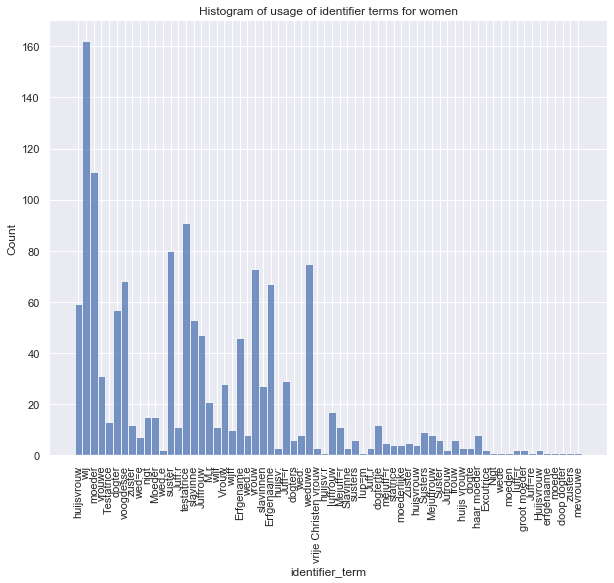

In [94]:
import seaborn as sns

g = sns.histplot(women_df, x="identifier_term")
sns.set(rc={'figure.figsize':(10, 8)})
plt.xticks(rotation=90)
plt.title("Histogram of usage of identifier terms for women") 


In [81]:
#men_per_doc = men_df.groupby("filename").apply(lambda df: df.shape[0])
#women_per_doc = women_df.groupby("filename").apply(lambda df: df.shape[0])

#sns.jointplot(x=women_per_doc, y=men_per_doc, kind="hex")
#_ = plt.xlabel("Women per Doc")
#_ = plt.ylabel("Men per Doc")

In [82]:
#for x in women_df.iterrows():
    #print(x[1].filename)
    #print("----")

### Statistics Indigenous

In [83]:
print("Percentage of docs with at least one mention of an indigenous person: ", indi_df.filename.unique().shape[0]/len(docs))
indi_per_doc = indi_df.groupby("filename").apply(lambda df: df.shape[0])
print("Mean and std. dev. number of indigenous peoples metions per document: ", indi_per_doc.mean(), indi_per_doc.var()**.5)

Percentage of docs with at least one mention of an indigenous person:  0.2945091514143095
Mean and std. dev. number of indigenous peoples metions per document:  1.5508474576271187 1.0232215217702916


Text(0.5, 1.0, 'Histogram of usage of identifier terms for indigenous people')

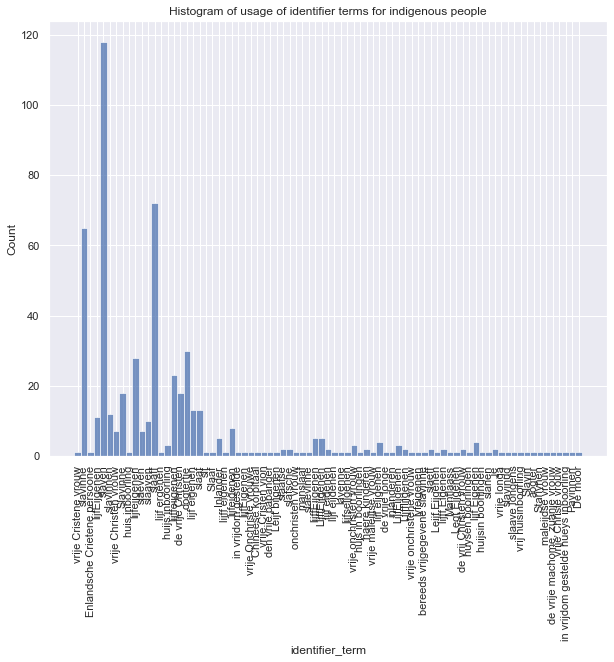

In [84]:
import seaborn as sns

g = sns.histplot(indi_df, x="identifier_term")
sns.set(rc={'figure.figsize':(10,8)})
plt.xticks(rotation=90)
plt.title("Histogram of usage of identifier terms for indigenous people") 
